# GA Final Project - Prudential Insurance 

In the insurance industry, companies need to pool people in different risk categories in order to price their insurance accordingly. In this project, we will analyze Prudential Insurance dataset to determine a risk category for any given individual. We will be using machine learning techniques by training the model with a train dataset and testing it with a test one.

In [61]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [62]:
data = pd.read_csv('/Users/omarpiceno/Desktop/GA_Final_Project/prudential_insurance_train.csv',index_col='Id')


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 58.0+ MB


In [64]:
data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [65]:
data.head(5)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [66]:
data.isnull().sum().sort_values(ascending=False)

Medical_History_10     58824
Medical_History_32     58274
Medical_History_24     55580
Medical_History_15     44596
Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
Employment_Info_6      10854
Medical_History_1       8889
Employment_Info_4       6779
Employment_Info_1         19
Medical_History_17         0
Medical_History_7          0
Medical_History_23         0
Medical_History_22         0
Medical_History_21         0
Medical_History_2          0
Medical_History_3          0
Medical_History_4          0
Medical_History_5          0
Medical_History_6          0
Medical_History_8          0
Medical_History_16         0
Medical_History_9          0
Medical_History_20         0
Medical_History_11         0
Medical_History_12         0
Medical_History_19         0
                       ...  
Medical_Keyword_17         0
Medical_Keyword_16         0
Medical_History_29         0
Medical_Histor

In [67]:
x = data.drop(columns=['Medical_History_10','Medical_History_15','Medical_History_24',
                       'Medical_History_32','Response','Family_Hist_5','Family_Hist_3',
                       'Family_Hist_2','Insurance_History_5'])
y = data.Response

In [68]:
imputed_1 = data['Family_Hist_4'].mean()

In [69]:
imputed_2 = data['Employment_Info_6'].mean()

In [70]:
#imputed_3 = data['Medical_History_1'].mean()

In [71]:
imputed_4 = data.Employment_Info_4.mean()

In [72]:
imputed_5 = data.Employment_Info_1.mean()

In [73]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 118 entries, Product_Info_1 to Medical_Keyword_48
dtypes: float64(10), int64(107), object(1)
memory usage: 53.9+ MB


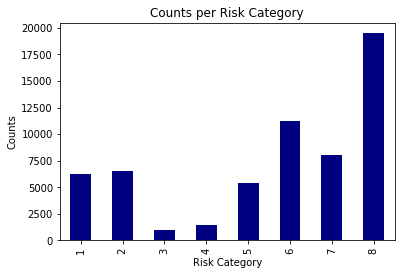

In [74]:
y.value_counts().sort_index().plot(kind='bar',color='navy')
plt.xlabel('Risk Category')
plt.ylabel('Counts')
plt.title('Counts per Risk Category');

In [75]:
print(data.Ins_Age.mean())
print(data.Ht.mean())
print(data.Wt.mean())

0.4055666833453549
0.7072831683213328
0.292586861446397
